In [2]:
from simulation import *
from aesthetics import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [3]:
from plot import *

# Load in pre-computed pandas `DataFrame`s

These pickle files contain flux, stall force, and maximum power for each torsion angle as a fuction of substrate concentration. The concentration is stored as an exponent (i.e., -6.0 means the substrate concentration is $10^{-6.0}$ M). Also note that during preparation of the manuscript, we changed the nomenclature of "Driven flux" to "Reciprocating flux." The `Max load` and `Max power` are set to be 0.0 if they are lower than 0.0001 kcal/(mol cycle) or 0.0001 kcal/(mol second).

In [3]:
adk_312 = pd.read_pickle('adk-concentration-scan.pickle')
pka_140 = pd.read_pickle('pka-concentration-scan.pickle')
hiv_10 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-10.pickle')
hiv_200 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-200.pickle')

In [33]:
df = return_concentration_slice(adk_312, -3)
df.head()

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
27090,-3.0,-0.144208,10.573240,chi1ALA11,3.059189,0.0,0.0,11
27091,-3.0,-0.007508,3.124329,chi1ALA127,1.412363,0.0,0.0,127
27092,-3.0,-0.032975,7.072458,chi1ALA17,2.718294,0.0,0.0,17
27093,-3.0,0.014157,4.480657,chi1ALA176,1.624334,0.0,0.0,176
27094,-3.0,0.013930,1.639636,chi1ALA186,0.580522,0.0,0.0,186


In [34]:
data_frame_to_chimera(df, df_index_column='ResID', df_target_column='Directional flux',
                     filename='adk-directional-flux-chimera', chimera_label='directionalFlux')

In [35]:
df = return_concentration_slice(hiv_200, -3)
df.head()

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
24450,-3.0,-0.026414,2.659631,chi1ALA121,0.920970,0.0,0.0,121
24451,-3.0,-0.000539,2.298046,chi1ALA127,0.824426,0.0,0.0,127
24452,-3.0,-0.041351,1.413070,chi1ALA170,0.489844,0.0,0.0,170
24453,-3.0,-0.026607,1.460113,chi1ALA22,0.474740,0.0,0.0,22
24454,-3.0,0.006422,1.737389,chi1ALA28,0.584563,0.0,0.0,28


In [36]:
data_frame_to_chimera(df, df_index_column='ResID', df_target_column='Directional flux',
                     filename='hiv-200-directional-flux-chimera', chimera_label='directionalFlux')

In [98]:
df = return_concentration_slice(pka_140, -3)
df.head()

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
40200,-3.0,-0.014286,3.171784,chi1ARG119,1.001205,-0.00001,3.624490e-08,119
40201,-3.0,-0.000113,16.091339,chi1ARG120,4.665881,0.00000,0.000000e+00,120
40202,-3.0,-0.155997,7.458688,chi1ARG123,2.087406,0.00000,0.000000e+00,123
40203,-3.0,-0.098021,1.312916,chi1ARG130,0.502688,-0.00075,3.651741e-05,130
40204,-3.0,19.501998,25.535148,chi1ARG151,7.853374,0.00669,6.514776e-02,151


In PKA, the PDB residue numbering is offset from this ResID by 14.

In [99]:
df['ResID'] = df['ResID'].astype(int).apply(lambda x: x+14).astype('O')

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [100]:
df.head()

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
40200,-3.0,-0.014286,3.171784,chi1ARG119,1.001205,-0.00001,3.624490e-08,133
40201,-3.0,-0.000113,16.091339,chi1ARG120,4.665881,0.00000,0.000000e+00,134
40202,-3.0,-0.155997,7.458688,chi1ARG123,2.087406,0.00000,0.000000e+00,137
40203,-3.0,-0.098021,1.312916,chi1ARG130,0.502688,-0.00075,3.651741e-05,144
40204,-3.0,19.501998,25.535148,chi1ARG151,7.853374,0.00669,6.514776e-02,165


In [106]:
data_frame_to_chimera(df, df_index_column='ResID', df_target_column='Directional flux',
                     filename='pka-directional-flux-chimera', chimera_label='directionalFlux')

# HIVP threshold plot at different concentrations

In [4]:
hiv_10 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-10.pickle')
hiv_100 = pd.read_pickle('hiv-high-catalytic-rate-100.pickle')
hiv_200 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-200.pickle')
hiv_300 = pd.read_pickle('hiv-high-catalytic-rate-300.pickle')

In [16]:
concentrations, hiv_10_directional_flux_above_1 = find_above_threshold(hiv_10, 'Directional flux', 1)
concentrations, hiv_100_directional_flux_above_1 = find_above_threshold(hiv_100, 'Directional flux', 1)
concentrations, hiv_200_directional_flux_above_1 = find_above_threshold(hiv_200, 'Directional flux', 1)
concentrations, hiv_300_directional_flux_above_1 = find_above_threshold(hiv_300, 'Directional flux', 1)

100%|██████████| 60/60 [00:00<00:00, 320.54it/s]


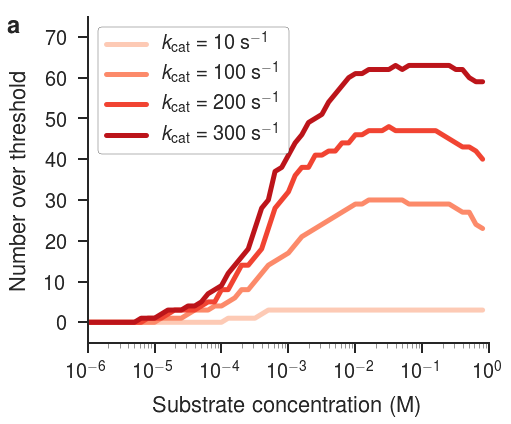

In [31]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Reds", 4)

ax.plot(concentrations, hiv_10_directional_flux_above_1, c=cmap[0], label=r'$k_\text{{cat}} = 10$ s$^{{-1}}$')
ax.plot(concentrations, hiv_100_directional_flux_above_1, c=cmap[1], label=r'$k_\text{{cat}} = 100$ s$^{{-1}}$')
ax.plot(concentrations, hiv_200_directional_flux_above_1, c=cmap[2], label=r'$k_\text{{cat}} = 200$ s$^{{-1}}$')
ax.plot(concentrations, hiv_300_directional_flux_above_1, c=cmap[3], label=r'$k_\text{{cat}} = 300$ s$^{{-1}}$')
ax.legend(loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')
ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number over threshold')
ax.set_xscale('log')
ax.set_ylim([-5, 75])
ax.set_xlim([10**-6, 10**0])
ax.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
paper_plot(fig)
panel_label('a', panel_xoffset=-0.2, panel_yoffset=0.95)

In [18]:
concentrations, hiv_10_directional_flux_above_point1 = find_above_threshold(hiv_10, 'Directional flux', 0.1)
concentrations, hiv_100_directional_flux_above_point1 = find_above_threshold(hiv_100, 'Directional flux', 0.1)
concentrations, hiv_200_directional_flux_above_point1 = find_above_threshold(hiv_200, 'Directional flux', 0.1)
concentrations, hiv_300_directional_flux_above_point1 = find_above_threshold(hiv_300, 'Directional flux', 0.1)

100%|██████████| 60/60 [00:00<00:00, 325.69it/s]


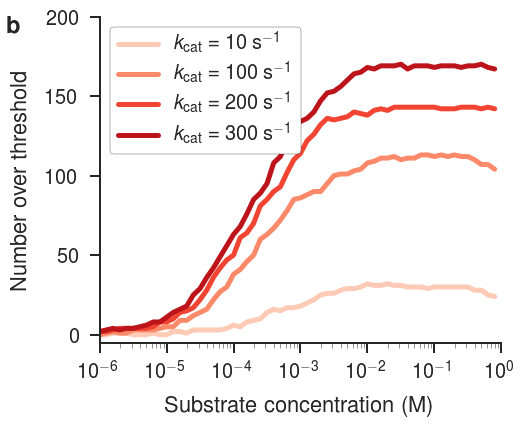

In [34]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Reds", 4)

ax.plot(concentrations, hiv_10_directional_flux_above_point1, c=cmap[0], label=r'$k_\text{{cat}} = 10$ s$^{{-1}}$')
ax.plot(concentrations, hiv_100_directional_flux_above_point1, c=cmap[1], label=r'$k_\text{{cat}} = 100$ s$^{{-1}}$')
ax.plot(concentrations, hiv_200_directional_flux_above_point1, c=cmap[2], label=r'$k_\text{{cat}} = 200$ s$^{{-1}}$')
ax.plot(concentrations, hiv_300_directional_flux_above_point1, c=cmap[3], label=r'$k_\text{{cat}} = 300$ s$^{{-1}}$')
ax.legend(loc='upper left', frameon=True, framealpha=1.0, edgecolor='k')
ax.set_xlabel('Substrate concentration (M)')
ax.set_ylabel('Number over threshold')
ax.set_xscale('log')
ax.set_ylim([-5, 200])
ax.set_xlim([10**-6, 10**0])
ax.set_xticks([10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0])
paper_plot(fig)
panel_label('b', panel_xoffset=-0.23, panel_yoffset=0.95)